### 1&2. Import libraries & Datasets

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# Ensure the graphs are displayed in notebook
%matplotlib inline

In [3]:
# Create a path
path = r'/Users/bazillaimran/Documents/03-2024 Airbnb US Analysis'

In [4]:
# Import the data
df = pd.read_csv(os.path.join(path,'02 Data','Prepared Data','df_with_states.csv'))
df.head()

,Unnamed: 0,listing_id,listing_name,host_id,host_name,neighborhood,latitude,longitude,room_type,price,...,availability_365,last_12_month_reviews_count,city,rental_type,price_category,listings_per_host,booking_requirement,popularity,coordinates,state
0,0,958,"Bright, Modern Garden Unit - 1BR/1BTH",1169,Holly,Western Addition,37.77028,-122.43317,Entire home/apt,202,...,128,59,San Francisco,Vacation Rental,mid-price,500 or less,less than 1 week,booked half year,"(37.77028, -122.43317)",California
1,1,5858,Creative Sanctuary,8904,Philip And Tania,Bernal Heights,37.74474,-122.42089,Entire home/apt,235,...,365,0,San Francisco,Vacation Rental,mid-price,500 or less,over 3 weeks,unbooked,"(37.74474, -122.42089)",California
2,2,8339,Historic Alamo Square Victorian,24215,Rosy,Western Addition,37.77564,-122.43642,Entire home/apt,575,...,365,0,San Francisco,Vacation Rental,high price,500 or less,1-3 weeks,unbooked,"(37.77564, -122.43642)",California
3,3,8739,"Mission Sunshine, with Private Bath",7149,Ivan & Wendy,Mission,37.76030,-122.42197,Private room,110,...,159,34,San Francisco,Vacation Rental,low price,500 or less,less than 1 week,booked half year,"(37.7603, -122.42197)",California
4,4,10537,Elegant & Cozy w/City views. Private room: Purple,36752,Teresa,Bayview,37.71750,-122.39698,Private room,95,...,365,1,San Francisco,Vacation Rental,low price,500 or less,less than 1 week,unbooked,"(37.7175, -122.39698)",California


In [5]:
# Drop coulumn 'Unnamed: 0'

df = df.drop(columns = ['Unnamed: 0'])

In [6]:
# Check the column names 

df.columns

Index(['listing_id', 'listing_name', 'host_id', 'host_name', 'neighborhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'last_12_month_reviews_count', 'city', 'rental_type', 'price_category',
       'listings_per_host', 'booking_requirement', 'popularity', 'coordinates',
       'state'],
      dtype='object')

In [7]:
df.dtypes

listing_id                          int64
listing_name                       object
host_id                             int64
host_name                          object
neighborhood                       object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
last_12_month_reviews_count         int64
city                               object
rental_type                        object
price_category                     object
listings_per_host                  object
booking_requirement                object
popularity                         object
coordinates                        object
state                             

In [8]:
# Define the mapping of rental types to numeric values
room_type_mapping = {
    'Entire home/apt': 1,
    'Hotel room': 2,
    'Private room': 3,
    'Shared room': 4
}

# Check unique values in the 'rental_type' column
print(df['room_type'].unique())

# Apply the mapping to create the new column
df['num_room_types'] = df['room_type'].map(room_type_mapping)

# Display the DataFrame to verify the changes
print(df)

['Entire home/apt' 'Private room' 'Shared room' 'Hotel room']
                listing_id                                       listing_name  \
0                      958              Bright, Modern Garden Unit - 1BR/1BTH   
1                     5858                                 Creative Sanctuary   
2                     8339                    Historic Alamo Square Victorian   
3                     8739                Mission Sunshine, with Private Bath   
4                    10537  Elegant & Cozy w/City views. Private room: Purple   
...                    ...                                                ...   
204449  849230448624862502  Private Half Moon Bay Oasis By Pillar Point Be...   
204450  850805127216414630                                      Home near SFO   
204451  851562104616413652                   Modern New Private Studio in SFO   
204452  851792795339759410            Lux Bedroom with a Shared Bath near SFO   
204453  851801296770555568             Lux Bedr

In [9]:
# Check for NaN values in the entire DataFrame
nan_values = df.isna().sum()
print(nan_values)

listing_id                         0
listing_name                      16
host_id                            0
host_name                          0
neighborhood                       0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
last_review                        0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
last_12_month_reviews_count        0
city                               0
rental_type                        0
price_category                     0
listings_per_host                  0
booking_requirement                0
popularity                         0
coordinates                        0
state                              0
num_room_types                     0
dtype: int64


In [10]:
from sklearn.preprocessing import StandardScaler
import numpy as np

In [11]:
# Initialize StandardScaler
scaler = StandardScaler()

In [12]:
# Change dtype for reviews_per_month
df['reviews_per_month'] = pd.to_numeric(df['reviews_per_month'], errors='coerce')

In [13]:
# Select numeric columns for subset
sub = df[['num_room_types','number_of_reviews', 'listing_id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'last_12_month_reviews_count']]

In [14]:
# Fit the scaler to the data and transform the data
scaled_data = scaler.fit_transform(sub)

In [15]:
print("\nScaled data:")
print(scaled_data)


Scaled data:
[[-0.60679583  4.02970583 -0.74591156 ... -0.36012163 -0.36314842
   2.14214183]
 [-0.60679583  0.79122501 -0.74591156 ... -0.36012163  1.41037275
  -0.60515685]
 [-0.60679583 -0.19698789 -0.74591156 ... -0.33135024  1.41037275
  -0.60515685]
 ...
 [-0.60679583 -0.53036092  1.71324812 ...  0.53179169  1.36547348
  -0.60515685]
 [ 1.59446278 -0.53036092  1.71391431 ... -0.30257884 -0.81962433
  -0.60515685]
 [ 1.59446278 -0.53036092  1.71393886 ... -0.30257884 -0.80465791
  -0.60515685]]


### 2. The elbow technique

In [16]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [17]:
score = [kmeans[i].fit(scaled_data).score(scaled_data) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

/Users/bazillaimran/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/bazillaimran/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/bazillaimran/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/bazillaimran/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of

[-2453448.0000000093,
 -2127105.98372128,
 -1886083.8138714028,
 -1741723.0970126465,
 -1623092.2416089082,
 -1517311.1899229935,
 -1435085.925210844,
 -1376188.377698025,
 -1317535.9227726972]

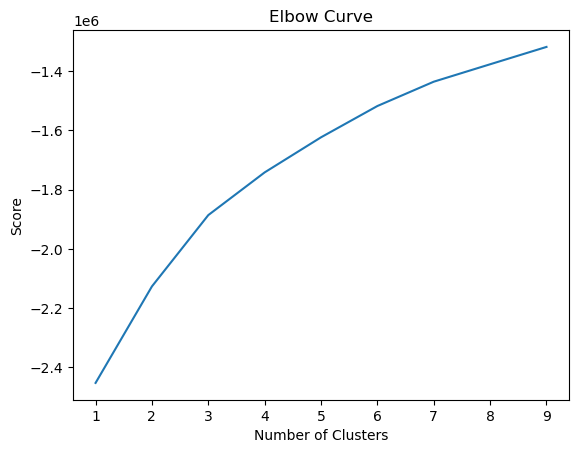

In [18]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

there's a large jump from one to two on the x-axis, but after that, the curve straightens out. This means that the optimal count for the clusters is two.

### 3. k-means clustering

In [19]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 

In [20]:
# Fit the k-means object to the data.

kmeans.fit(scaled_data)

/Users/bazillaimran/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [21]:
# Convert scaled_data to a DataFrame if it's a NumPy array
scaled_data = pd.DataFrame(scaled_data, columns=sub.columns)

# Fit the k-means object to the data and assign clusters
scaled_data['clusters'] = kmeans.fit_predict(scaled_data)

/Users/bazillaimran/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [22]:
scaled_data.head()

,num_room_types,number_of_reviews,listing_id,host_id,latitude,longitude,price,minimum_nights,reviews_per_month,calculated_host_listings_count,availability_365,last_12_month_reviews_count,clusters
0,-0.606796,4.029706,-0.745912,-0.999667,0.232554,-1.245617,0.036518,-0.615074,0.471165,-0.360122,-0.363148,2.142142,1
1,-0.606796,0.791225,-0.745912,-0.999619,0.227669,-1.244992,0.242332,1.694575,-0.404449,-0.360122,1.410373,-0.605157,2
2,-0.606796,-0.196988,-0.745912,-0.999524,0.233580,-1.245782,2.362839,-0.037662,-0.664479,-0.331350,1.410373,-0.605157,0
3,1.594463,8.637397,-0.745912,-0.999630,0.230645,-1.245047,-0.537266,-0.697562,1.712944,-0.331350,-0.131169,0.978032,1
4,1.594463,-0.304144,-0.745912,-0.999446,0.222458,-1.243776,-0.630818,-0.697562,-0.691013,-0.331350,1.410373,-0.558592,2


In [23]:
scaled_data['clusters'].value_counts()

clusters
2    89297
0    77858
1    37299
Name: count, dtype: int64

### Clusters of 'number_of_reviews' in relationship to all other variables

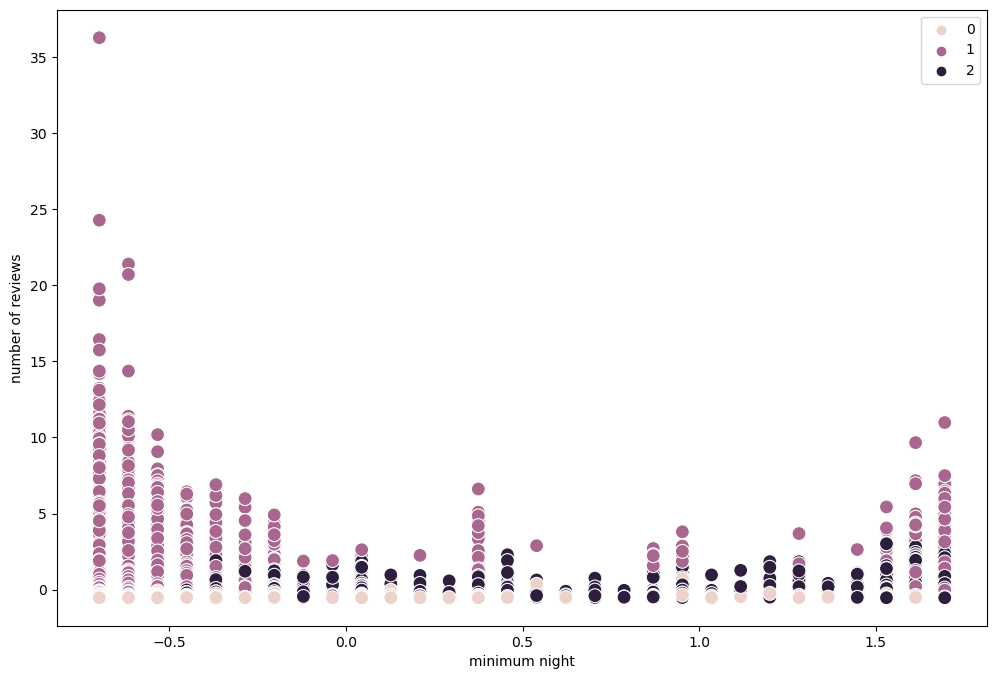

In [24]:
# Plot the clusters for the "minimum night" and "number of reviews" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=scaled_data['minimum_nights'], y=scaled_data['number_of_reviews'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('minimum night') # Label x-axis.
plt.ylabel('number of reviews') # Label y-axis.
plt.show()

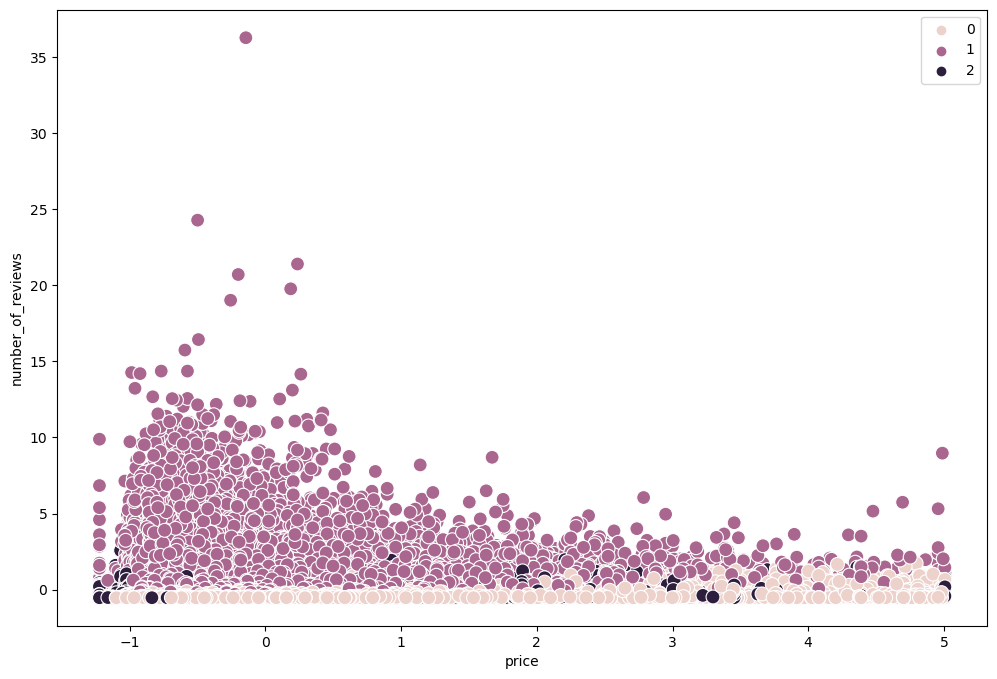

In [25]:
# Plot the clusters for the "price" and "number_of_reviews" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=scaled_data['price'], y=scaled_data['number_of_reviews'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('price') 
plt.ylabel('number_of_reviews') 
plt.show()

#'number_of_reviews', 'listing_id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'last_12_month_reviews_count'

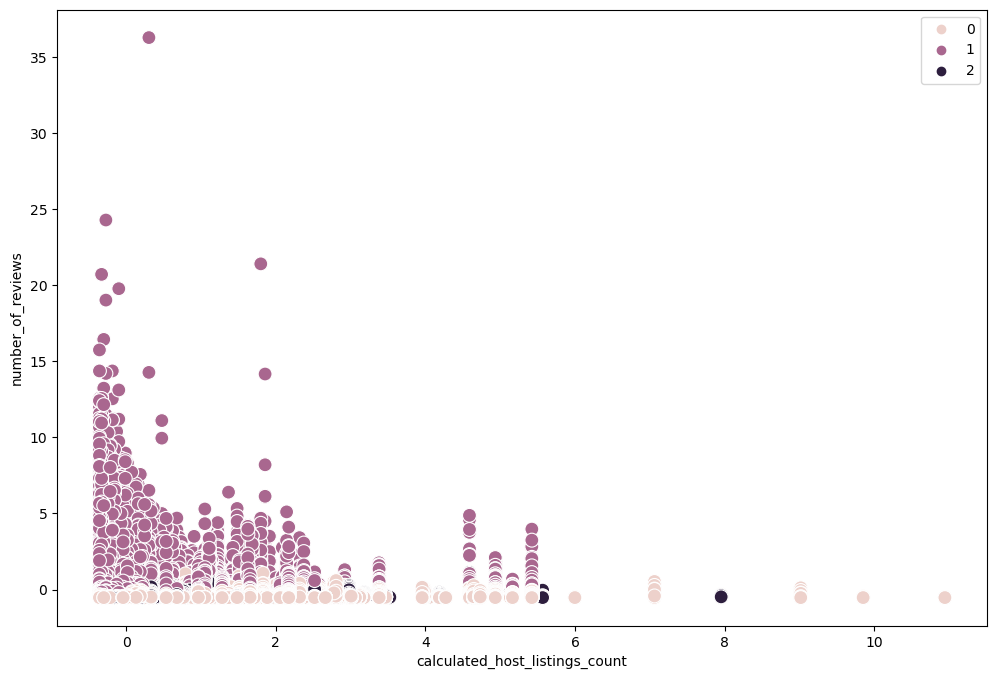

In [26]:
# Plot the clusters for the "calculated_host_listings_count" and "number_of_reviews" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=scaled_data['calculated_host_listings_count'], y=scaled_data['number_of_reviews'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('calculated_host_listings_count') 
plt.ylabel('number_of_reviews') 
plt.show()

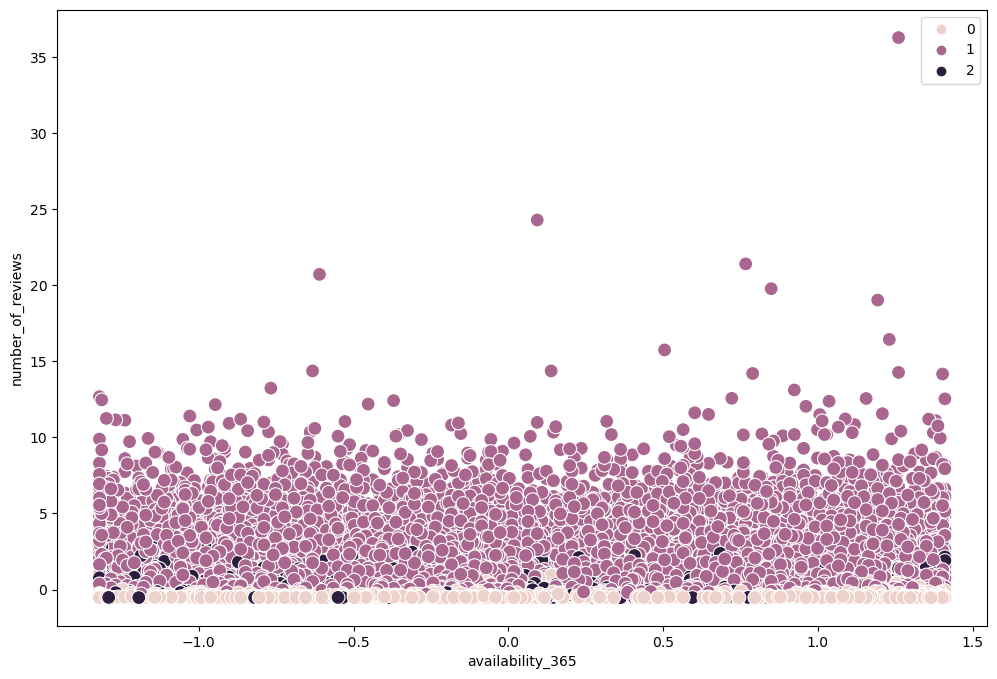

In [27]:
# Plot the clusters for the "'availability_365'" and "number_of_reviews" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=scaled_data['availability_365'], y=scaled_data['number_of_reviews'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('availability_365') 
plt.ylabel('number_of_reviews') 
plt.show()

### 4. Descriptive statistics

In [28]:
scaled_data.loc[scaled_data['clusters'] == 2, 'cluster'] = 'dark purple'
scaled_data.loc[scaled_data['clusters'] == 1, 'cluster'] = 'plum'
scaled_data.loc[scaled_data['clusters'] == 0, 'cluster'] = 'light pink'

In [29]:
scaled_data.groupby('cluster').agg({'calculated_host_listings_count':['mean', 'median'], 
                         'price':['mean', 'median'], 
                         'availability_365':['mean', 'median'],
                          'number_of_reviews':['mean', 'median'],
                           'minimum_nights':['mean', 'median']})

calculated_host_listings_count               price            \
                                      mean    median      mean    median   
cluster                                                                    
dark purple                      -0.128481 -0.331350 -0.233630 -0.474899   
light pink                        0.232490 -0.273807  0.348870 -0.025850   
plum                             -0.177707 -0.331350 -0.168901 -0.368873   

            availability_365           number_of_reviews            \
                        mean    median              mean    median   
cluster                                                              
dark purple        -0.397075 -0.714859         -0.246859 -0.435111   
light pink          0.450295  0.774300         -0.400973 -0.482736   
plum                0.010685 -0.101236          1.427993  0.993630   

            minimum_nights            
                      mean    median  
cluster                               
dark purple       0.534291  0.044826  
light pink       -0.332699 -0.615074  
plum             -0.584661 -0.615074

Dark Purple: This cluster may represent properties with lower activity levels, lower prices, and possibly shorter minimum stay requirements.

Light Pink Cluster: This cluster may represent properties with higher prices, higher availability throughout the year, and more reviews, suggesting higher demand or popularity.

Plum Cluster: This cluster may represent properties managed by multiple hosts, with moderate prices, availability, and review activity.

### Clusters of 'price' in relationship to all other variables

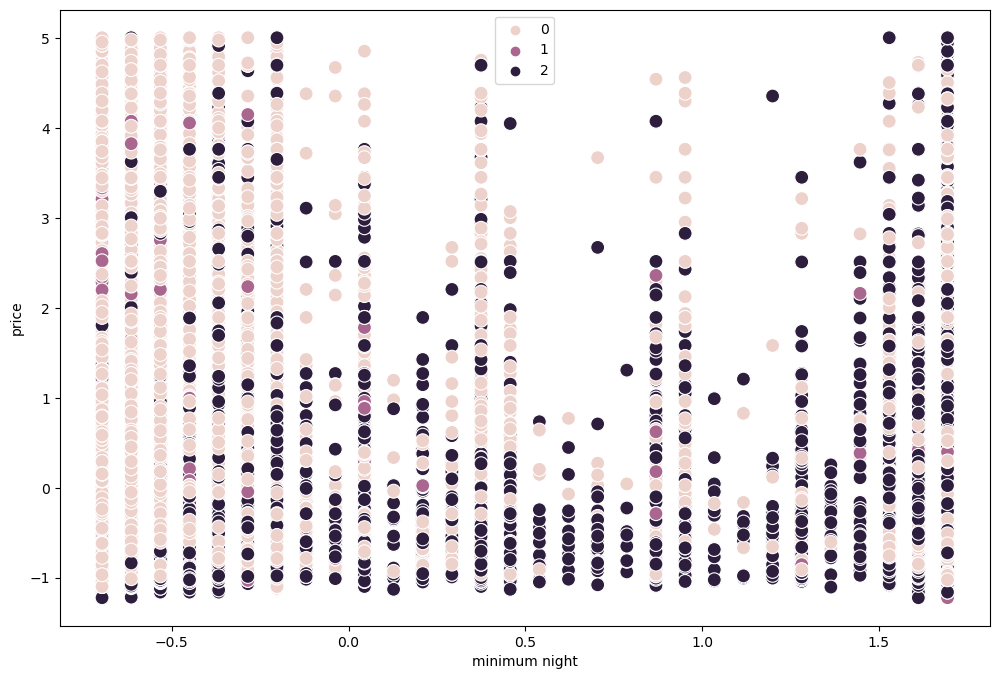

In [30]:
# Plot the clusters for the "minimum night" and "price" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=scaled_data['minimum_nights'], y=scaled_data['price'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('minimum night') # Label x-axis.
plt.ylabel('price') # Label y-axis.
plt.show()

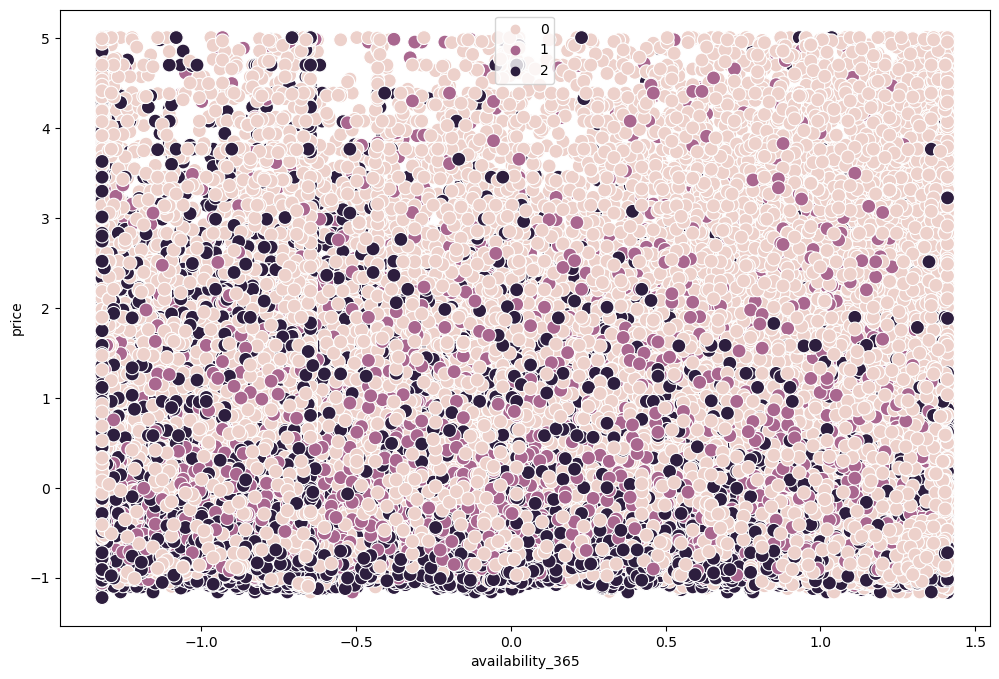

In [31]:
# Plot the clusters for the "'availability_365'" and "price" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=scaled_data['availability_365'], y=scaled_data['price'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('availability_365') 
plt.ylabel('price') 
plt.show()

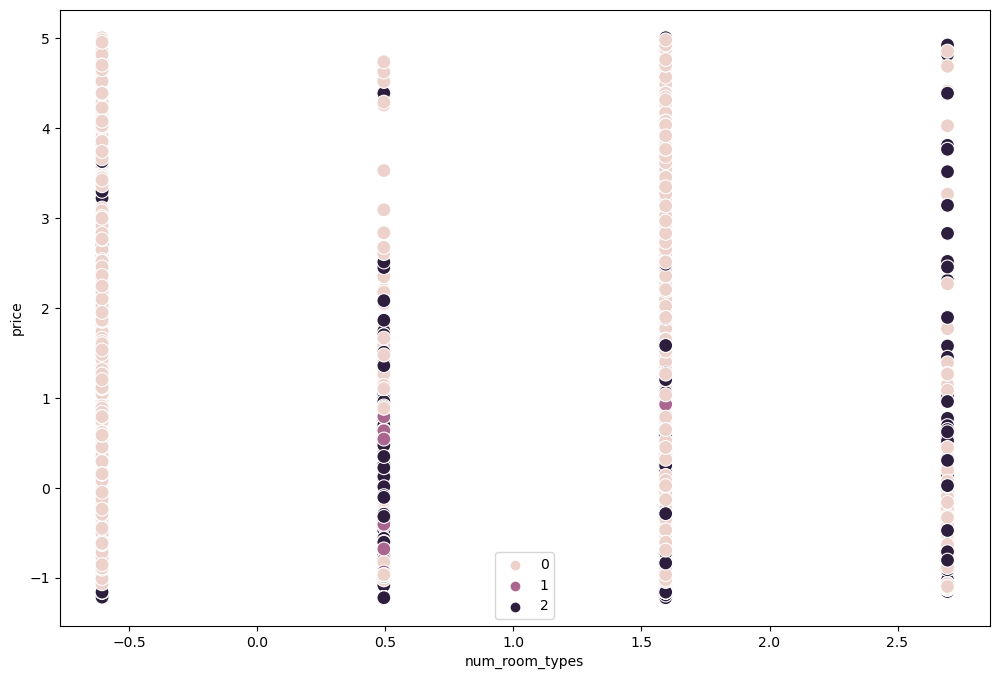

In [32]:
# Plot the clusters for the "num_room_types" and "price" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=scaled_data['num_room_types'], y=scaled_data['price'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('num_room_types') 
plt.ylabel('price') 
plt.show()

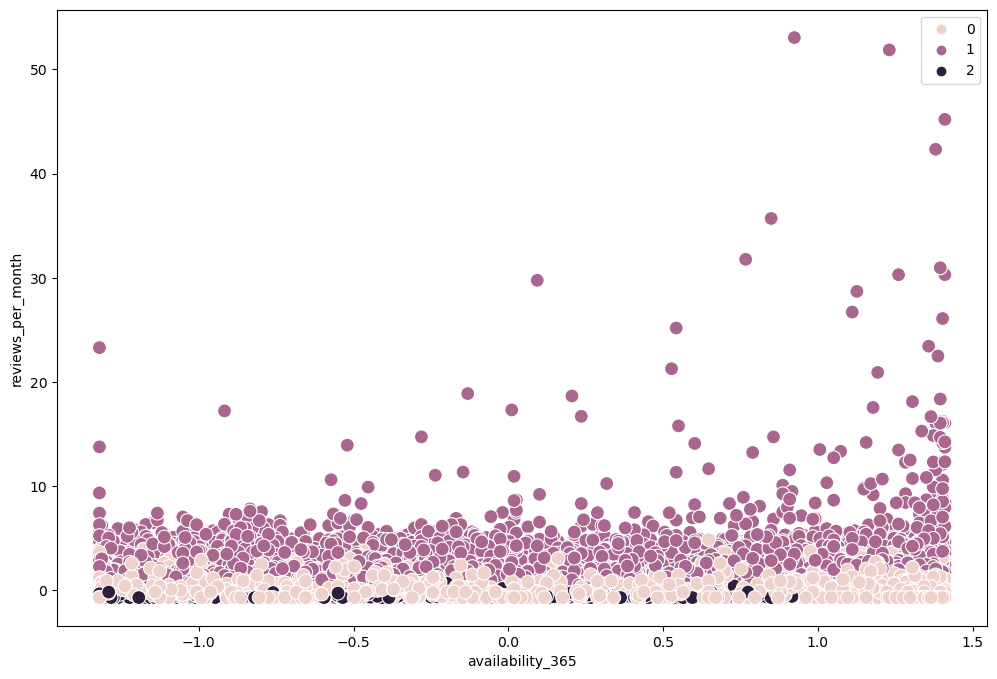

In [33]:
# Cluster Scatter plot of availity and review_per_month
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=scaled_data['availability_365'], y=scaled_data['reviews_per_month'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('availability_365') 
plt.ylabel('reviews_per_month') 
plt.show()

### Other variables 

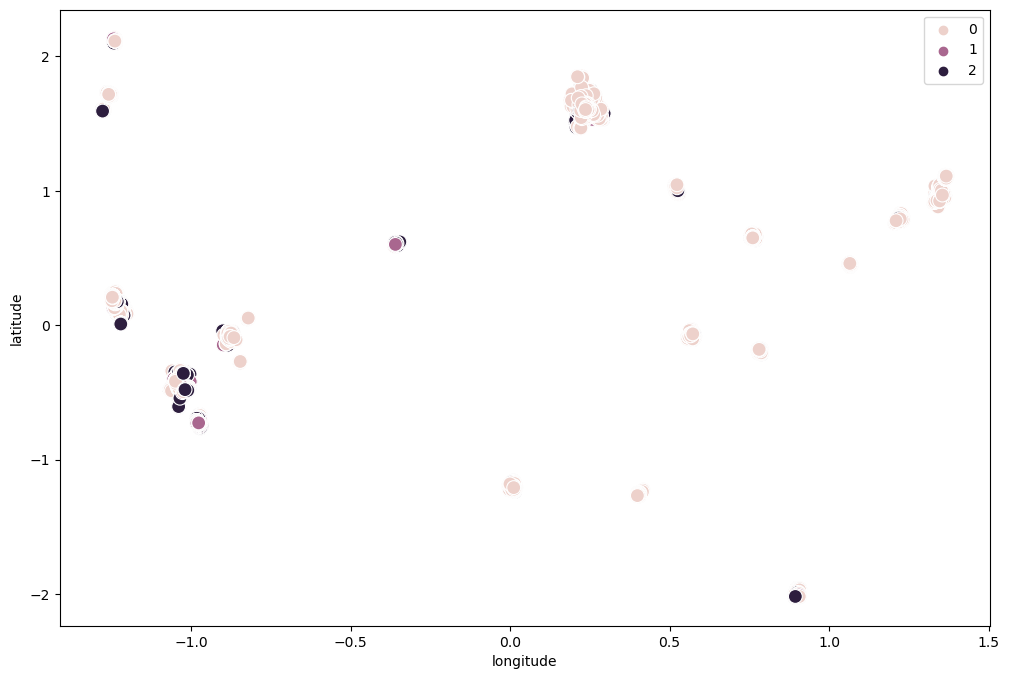

In [34]:
# Cluster Scatter plot of latitude and longitude
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=scaled_data['longitude'], y=scaled_data['latitude'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('longitude') 
plt.ylabel('latitude') 
plt.show()

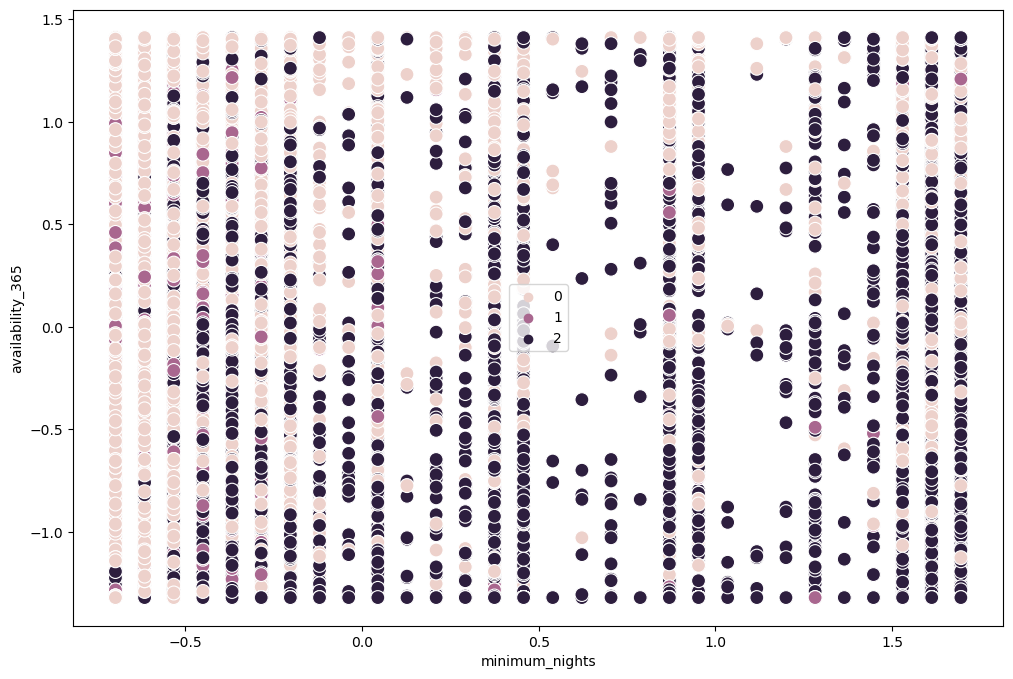

In [35]:
# Cluster Scatter plot of latitude and longitude
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=scaled_data['minimum_nights'], y=scaled_data['availability_365'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('minimum_nights') 
plt.ylabel('availability_365') 
plt.show()

### Descriptive Analysis for other variables

In [36]:
scaled_data.groupby('cluster').agg({'num_room_types':['mean', 'median'], 
                         'price':['mean', 'median'], 
                         'availability_365':['mean', 'median'],
                          'longitude':['mean', 'median'],
                           'latitude':['mean', 'median']})

num_room_types               price           availability_365  \
                      mean    median      mean    median             mean   
cluster                                                                     
dark purple       0.266058 -0.606796 -0.233630 -0.474899        -0.397075   
light pink       -0.181941 -0.606796  0.348870 -0.025850         0.450295   
plum             -0.257182 -0.606796 -0.168901 -0.368873         0.010685   

                      longitude            latitude            
               median      mean    median      mean    median  
cluster                                                        
dark purple -0.714859  0.051740  0.013350  0.187251  0.236089  
light pink   0.774300  0.004288  0.012699 -0.257798 -0.104345  
plum        -0.101236 -0.132822  0.004647  0.089832 -0.070357

Dark Purple: This cluster seems to have relatively higher values for 'num_room_types' (smaller rental space) and 'availability_365' compared to the other clusters. The 'price' values are lower on average, and the longitude and latitude values are spread out, indicating potential diversity in geographical locations.

Light Pink: This cluster shows moderate values for most variables, with slightly higher 'price' and 'availability_365' compared to the other clusters. The longitude and latitude values are relatively closer, suggesting a more concentrated geographical area.

Plum: In this cluster, 'num_room_types' and 'availability_365' have lower average values compared to the other clusters. The 'price' values are also lower, and there's less variation in longitude and latitude, indicating a more homogeneous geographical distribution.

In [37]:
# Export the dataframe to csv file

scaled_data.to_csv(os.path.join(path,'02 Data','Prepared Data', 'clusters.csv'))